In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class dAE(nn.Module):
    def __init__(self):
        super(dAE,self).__init__()
        
        self.encoder=nn.Sequential(
                      nn.Linear(784,400),
                      nn.ReLU(True),
                      nn.Linear(400,20),
                      nn.ReLU(True)
                      )

        self.decoder=nn.Sequential(
                      nn.Linear(20,400),
                      nn.ReLU(True),
                      nn.Linear(400,784),
                      nn.Sigmoid()
                      )

    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [3]:
class AddRandomNoise(object):
    def __init__(self):
        self.row = 28
        self.col = 28
        
    def __call__(self, tensor):
        noise = torch.randn(tensor.size())
        tensor += tensor*noise
        return tensor
    
    def __repr__(self):
        return self.__class__.__name__

In [4]:
transform = transforms.Compose([transforms.ToTensor(), AddRandomNoise()])
trainset = torchvision.datasets.MNIST(root = './', train = True, download = True,transform = transform)
testset = torchvision.datasets.MNIST(root = './', train = False, download = True,transform = transform)
print(type(trainset))
print(trainset)
print(len(trainset))
print(testset)

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               AddRandomNoise
           )
60000
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               AddRandomNoise
           )


In [5]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False)

In [6]:
# init network
ae = dAE()
print(ae)

dAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=20, bias=True)
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [7]:
#init optimizer
optimizer = optim.SGD(ae.parameters(), lr = 0.01, momentum = 0.9)
# init loss function
criterion = nn.BCELoss()
print(criterion)
print(optimizer)

BCELoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [8]:
epochs = 10
losslist = []
predictions = []
# traing_accuracy_list = []
for epoch in range(0,epochs):
    total_loss = 0
#     training_accuracy = 0
    for batchId, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        data = data.view(-1, 784)
        # gradient is set to 0
        optimizer.zero_grad()
        # passing through the network
        net_out = ae(data)
        # calculaing BCE loss
        loss = criterion(net_out, data)
        # propogating loss at current step
        loss.backward()
        # updating parameters (in steps) after gradient descent
        optimizer.step()
        # calculate total loss
        total_loss += loss
        # predictions
        predictions.append(net_out)
#         accuracy
#         training_accuracy += pred.eq(target.data).sum()
    losslist.append(total_loss.item()/len(train_loader.dataset))
#     traing_accuracy_list.append(training_accuracy.item()/len(train_loader.dataset))
    print('loss at epoch: {} = {}'.format(epoch,total_loss/len(train_loader.dataset)))
        

loss at epoch: 0 = 0.006532351020723581
loss at epoch: 1 = 0.004203190561383963
loss at epoch: 2 = 0.004137182608246803
loss at epoch: 3 = 0.004027580376714468
loss at epoch: 4 = 0.0038788875099271536
loss at epoch: 5 = 0.0037563208024948835
loss at epoch: 6 = 0.0035349808167666197
loss at epoch: 7 = 0.003288447391241789
loss at epoch: 8 = 0.003097617533057928
loss at epoch: 9 = 0.002929027657955885


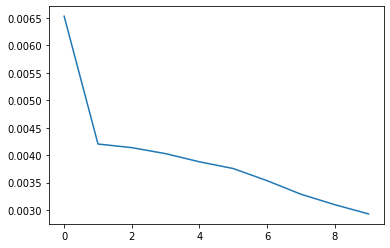

In [9]:
plt.plot(losslist)
plt.savefig(fname='dae.png',format='png')

In [10]:
torch.save(ae, "hw5_dAE.pth")
model = dAE()
model = torch.load( "hw5_dAE.pth")

/Users/deadsenses/myenv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type dAE. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/deadsenses/myenv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/deadsenses/myenv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/deadsenses/myenv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It 

TypeError: Invalid shape (784,) for image data

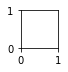

In [14]:
# dataiter = iter(test_loader)
# images, labels = dataiter.next()
# # testiter = iter(test_loader)
# # images_test, labels_test = testiter.next()
# figure = plt.figure()
# num_of_images = 5
# # _, axes = plt.subplots(1,2)
# for index in range(1, num_of_images + 1):
#     res = ae(images.view(images.size(0),-1))
#     plt.subplot(5, 2, index*2)
#     plt.imshow(res[index].detach().numpy().squeeze(), cmap='gray_r')
#     plt.subplot(5, 2, 2*index-1)
#     plt.imshow(images[index].detach().numpy().squeeze(), cmap='gray_r')
#     plt.axis('off')
figure = plt.figure()
num_of_images = 5
index = 0
for batchId, (data,_) in enumerate(test_loader):
    index += 1
    data  = Variable(data)
    data = data.view(-1,784)
    res = ae(data)
    plt.subplot(5, 2, index*2)
    plt.imshow(res.detach().numpy().squeeze(), cmap='gray_r')
    plt.subplot(5, 2, 2*index-1)
    plt.imshow(data.numpy().squeeze(), cmap='gray_r')
    plt.axis('off')
    if index == 5:
        break
    
# testiter = iter(test_loader)
# images, labels_test = testiter.next()
# figure = plt.figure()
# num_of_images = 16
# # _, axes = plt.subplots(1,2)
# for index in range(1, num_of_images+1):
#     res = ae(images.view(images.size(0),-1))
#     plt.subplot(4, 4, index)
#     plt.imshow(res[1].detach().numpy().squeeze(), cmap='gray_r')
#     plt.axis('off')